# Activation functions for Neural networks

In simple words, the activation function is an equation that is used to convert an input of a node in a Neural network/Layer to an output. It is a logic “gate” in between the input feeding the current neuron and its output going to the next layer(if stacked).

The main objective of the activation function is to introduce non-linearilty to neuron and determine whether to activate a neuron in a layer or not. Such that, during model building, only the activated neurons are considered.  





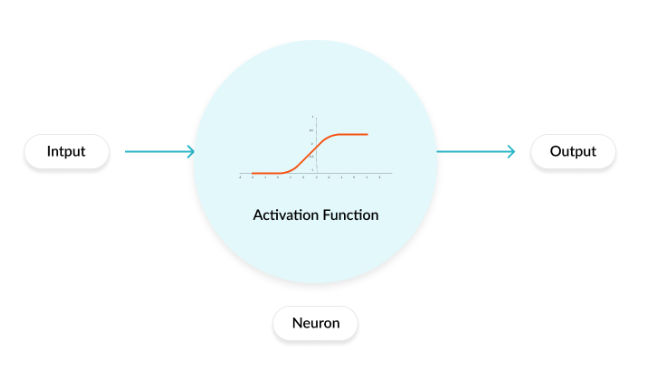

#### Basic features of any activation function are:

1)  It must be differential- In the process of backpropgation.

2)  Ideally Non-linear - They allow the model to create complex mappings between the network’s inputs and outputs, which are essential for learning and modeling complex and multidimensional data.



There are several activation functions, can be compared by computational efficiency because they are calculated across thousands and millions of data or by taking gradient.


## Widely used activation functions are as follows:
1) Sigmoid 

2) Tanh(Hyperbolic tangent)

3) ReLU(Rectified Linear Unit) and its varients 

4) Softmax 

5) Swish




### Sigmoid 

Ranges in between 0 and 1. 

Advantages:

    + Simple and smooth curve
    + Clear predictions
    + Can be used in any layer including the output layer
    
    
Disadvantages:

    - Non-Zero centric- for large negative and positive values the output is positive and in opposite directions but 
    between [0,1] which makes it difficult to calculate gradient for such small values. 
    - Vanishing Gradient- the change in predicted values for large positive numbers is infinitesimal.
    - The calculation is computationally complex for large networks.
    



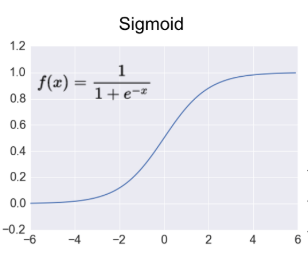

Implementaion of sigmoid

In [1]:
import numpy as np
def sigmoid(z):
 return 1 / (1 + np.exp(-z))
print("Sigmoid of 4 is:",sigmoid (4))

Sigmoid of 4 is: 0.9820137900379085


In [2]:
#Non-zero centric

In [3]:
print("Sigmoid of positive number(5) is:",sigmoid(5))

Sigmoid of positive number(5) is: 0.9933071490757153


In [4]:
print("Sigmoid of negative number(-5) is:",sigmoid(-5))

Sigmoid of negative number(-5) is: 0.0066928509242848554


In [5]:
print("Difference between Derivative of Sigmoid (5) and (-5) is:", sigmoid(5)*(1- sigmoid(5))-sigmoid(-5)*(1- sigmoid(-5)))

Difference between Derivative of Sigmoid (5) and (-5) is: -1.214306433183765e-16


For derivative of sigmoid refer 
https://math.stackexchange.com/questions/78575/derivative-of-sigmoid-function-sigma-x-frac11e-x

----> The derivatives of the outputs when compared for gradient decent will be very less

In [6]:
#vanishing gradient

In [7]:
print("Difference between sigmoid of 14 and 15:",sigmoid(15)-sigmoid(14))

Difference between sigmoid of 14 and 15: 5.256258007735326e-07


----> The difference in nearby predicted values is very less 

### TanH

Ranges in between -1 and 1

It is a shifted version of sigmoid from [0,1] to [-1,1]

Advantages:

    + Zero-centric- it accommodates large positive and negative values because if calculates local (or global) minimum 
    quickly as derivatives of the tanh are larger than the derivatives of the sigmoid. It can minimize the cost function           faster.
    
    
Disadvantages:

    - Vanishing gradient problem



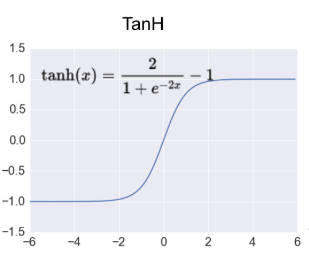

Implementaion of tanH

In [8]:
def tanh(z):
 return np.tanh(z)

In [9]:
print("tanh of 4 is:",tanh(4))

tanh of 4 is: 0.999329299739067


In [10]:
#zero-centric 

In [11]:
print("tanh of positive number(15) is:",tanh(15))

tanh of positive number(15) is: 0.9999999999998128


In [12]:
print("tanh of positive number(-15) is:",tanh(-15))

tanh of positive number(-15) is: -0.9999999999998128


----> The output is far from each other hence eas to calulate the gradient

In [13]:
#vanishing gradient

print("Difference between tanh of 14 and 15:",np.tanh(15)-np.tanh(14))

Difference between tanh of 14 and 15: 1.1957101975212936e-12


----> The difference in nearby predicted values is very less 

### ReLU(Rectified Linear Unit)

Ranges in between 0 to max(x)

Condition :

           0   X < 0
           X  otherwise
Advantages:
    
    + Simple and computationally efficent 
    + No vanishing gradient problem- as the input remains the same
    + Non-linear 
    + Sparsity- increases speed of the model by removing unwanted features(Most of the times)
    
Disadvantages:
    
    - Dead Neurons- the gradient(slope) in the negative region is 0 deactivates the neurons which cannot be changed during            backpropagation and optimization.
    - Cannot be used as the activation function for final layer.
           




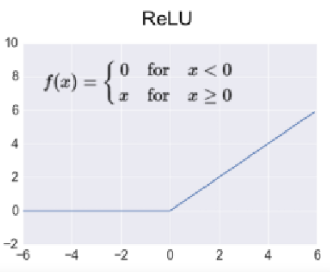

Implementaion of ReLU

In [14]:
def relu(z):
  return max(0, z)

In [15]:
z= 10
print("ReLU of "+str(z)+" is :",relu(z))

ReLU of 10 is : 10


In [16]:
# Dead neuron
z= -0.4
print("ReLU of "+str(z)+" is :",relu(z)) 
z= -50
print("ReLU of "+str(z)+" is :",z * (z > 0))

ReLU of -0.4 is : 0
ReLU of -50 is : 0


----> all the neurons valued from [0,-inf) are deactivated which may harm the model during backpropagation

### Varients of ReLU

    Leaky ReLU 
    Parametric ReLU  
    Exponential ReLU

#### Leaky ReLU 

The only differnce from ReLU is replacing the negative values with constant(=0.01) times the value instead of 0. 

Condition :

           0.01   X < 0
           X  otherwise


Advantange:
    
    + Prevents the dead neurons problem- due to the replacement of negative values the neurons do not deactive and block 
     from active backpropagation.
    
Disadvantage:
      
    -  Output not constant ## check


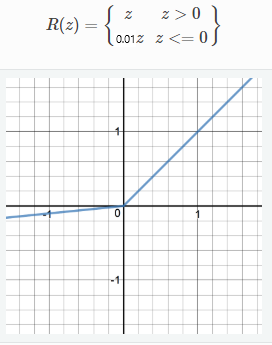

Implementaion of Leaky ReLU

In [17]:
def leakyrelu(z):
  return np.maximum(0.01 * z, z)

In [18]:
z= 10
print("ReLU of "+str(z)+" is :",leakyrelu(z)) #positive value

ReLU of 10 is : 10.0


In [19]:
z= -1
print("ReLU of "+str(z)+" is :",leakyrelu(z)) #negative number

ReLU of -1 is : -0.01


#### Parametric ReLU

Similar to Leaky ReLU but replaces the negative values with variable paramater(α) times the value instead of 0

Condition :

       α   X < 0
       X  otherwise

Advantange:
    
    + Allows the negative slope to be learned— unlike leaky ReLU, this function provides the slope of the negative part 
    which helps in finding the most appropriate value of α.

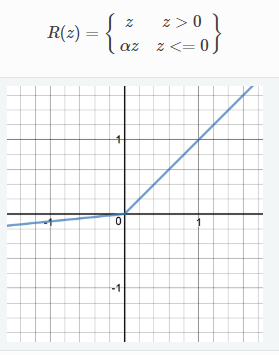

Implementaion of Parametric ReLU



In [20]:
def parmetricrelu(z,α):
  return np.maximum(α * z, z)

In [21]:

print("ReLU of "+str(z)+" is :",parmetricrelu(10,0.5)) #positive value

print("ReLU of "+str(z)+" is :",parmetricrelu(-1,0.5)) #negative number


ReLU of -1 is : 10.0
ReLU of -1 is : -0.5


#### Exponential ReLU

The only differnce from ReLU is replacing the negative values with exponent times the value instead of 0.
Condition :

       (e^x-1)   X < 0
       X  otherwise

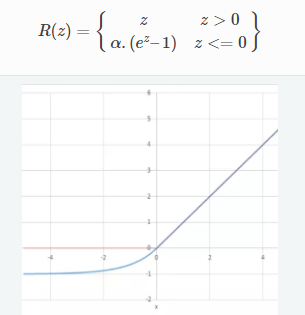

In [22]:
def erelu(z,alpha):
    return z if z >= 0 else alpha*(np.exp(z) -1)

In [23]:
print("Exponential ReLu for 10 is :",erelu(10,3))
print("Exponential ReLu for -10 is :",erelu(-10,3))

Exponential ReLu for 10 is : 10
Exponential ReLu for -10 is : -2.9998638002107123


### Softmax 

It is a form of logistic regression that normalizes an input value into a vector of values that follows a probability distribution whose total sums up to 1
Advantange:
    + Multi-dimensional classification
    + Generally used as output neuron

In [24]:
def softmax(x):
    ex = np.exp(x)
    sum_ex = np.sum( np.exp(x))
    return ex/sum_ex


print ("softmax of 1,2 and 3 is:",softmax([1,2,3]))

softmax of 1,2 and 3 is: [0.09003057 0.24472847 0.66524096]


### Swish

Swish is a new, self-gated activation function discovered by researchers at Google to achieve better performance compared to ReLU 

A notable thing is that the β scaling factor is introduced in Swish.

If β=1, then activation function is called the Sigmoid-weighted Linear Unit (SiL)

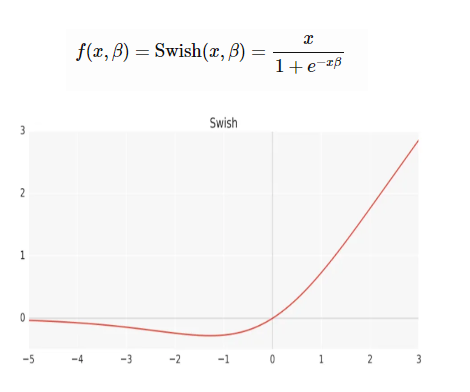

Referneces:

- https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f

- https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0


THANK YOU FOR READING. UPVOTE IF YOU FIND IT USEFUL
****